In [1]:
import os
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from dataset import TARXrayDataset  
import random
from torch.utils.data import DataLoader, random_split

In [2]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

image_dir = "/data/home/cos557/jg0037/rothman/images"
csv_path = "/data/home/cos557/jg0037/rothman/parsed_xray_files_log.csv"
patient_info_path = "/data/home/cos557/jg0037/rothman/TAR_Sheet_fo_stats_SGP_7_9_24_output4.csv"

full_dataset = TARXrayDataset(image_dir=image_dir, csv_path=csv_path, patient_info_path=patient_info_path, transform=transform)
print(f"Loaded dataset with {len(full_dataset)} image sets.")

Loaded dataset with 1945 image sets.


In [3]:
def variable_length_collate(batch):
    if len(batch[0]) == 3:  # if metadata is included
        images, labels, metadata = zip(*batch)
        metadata_tensor = torch.stack(metadata)  # shape: [B, metadata_dim]
        return list(images), torch.tensor(labels, dtype=torch.float32), metadata_tensor
    else:
        images, labels = zip(*batch)
        return list(images), torch.tensor(labels, dtype=torch.float32)

In [40]:
total_size = len(full_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

seed = 44
generator = torch.Generator().manual_seed(seed)
# seed=56
seed=56
train_set, val_set, test_set = full_dataset.split_by_patient(seed=seed)
train_loader = DataLoader(train_set, batch_size=8, collate_fn=variable_length_collate, num_workers=0, pin_memory=False)
val_loader = DataLoader(val_set, batch_size=8, collate_fn=variable_length_collate, num_workers=1, pin_memory=False)
test_loader = DataLoader(test_set, batch_size=8, collate_fn=variable_length_collate, num_workers=1, pin_memory=False)


Train Set: Total=1347, Positives=88, Negatives=1259
Val Set: Total=301, Positives=17, Negatives=284
Test Set: Total=297, Positives=22, Negatives=275


Batch 0
Batch 1
Batch 2
Batch 3
Batch 4
Batch 5
Batch 6
Batch 7
Batch 8
Batch 9
Batch 10
Batch 11
Batch 12
Batch 13
Batch 14
Batch 15
Batch 16
Batch 17
Batch 18
Batch 19
Batch 20
Batch 21
Batch 22
Batch 23
Batch 24
Batch 25
Batch 26
Batch 27
Batch 28
Batch 29
Batch 30
Batch 31
Batch 32
Batch 33
Batch 33:
  Sample 0:
    Num images: 3
    Label: 0.0
    Metadata: tensor([0.9559, 0.5914, 1.1291, 0.4585, 0.1318])
  Sample 1:
    Num images: 7
    Label: 0.0
    Metadata: tensor([ 0.0863,  0.6614, -0.8857,  0.6192,  0.0669])
  Sample 2:
    Num images: 5
    Label: 0.0
    Metadata: tensor([-0.8702, -0.5891,  1.1291,  1.4358, -0.0057])
  Sample 3:
    Num images: 9
    Label: 0.0
    Metadata: tensor([-0.2615,  1.0680, -0.8857,  0.1239,  0.4126])
  Sample 4:
    Num images: 5
    Label: 0.0
    Metadata: tensor([ 0.6081, -0.4303, -0.8857,  0.4452,  0.3938])
  Sample 5:
    Num images: 5
    Label: 0.0
    Metadata: tensor([-0.5224, -0.1504, -0.8857, -0.5187,  0.4253])
  Sample 6:
    Num i

In [7]:
def show_image_set(images, label, title=None, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 4))
    for i, img_tensor in enumerate(images):
        img = img_tensor.permute(1, 2, 0).numpy()  # C x H x W → H x W x C
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')
    label_str = "Revision Needed (1)" if label == 1 else "No Revision Needed (0)"
    plt.suptitle(title or f"Label: {label_str}", fontsize=16)
    plt.show()


Patient info:
tensor([-0.5224, -1.1444, -0.8857, -0.1974,  0.1032])
Metadata:
patient_id: 1050
revision_status: 0
prepost_status: 1
days_postop: 120
ID: 1050
Age: 62
Race (White= 0, Black= 1, Asian= 2, Hispanic= 3, More than 1= 4, Other/No report=5): 0
sex (m=0, f=1): 0
BMI: 22.47
CCI mdcalc.com: 2.0
LOS: nan
Insurance (Medicare=0, Medicaid=1, PPO/HMO=2): 2
Marital Status (Single=0, Married=1, Divorced=2, Not Reported= 3): 1
DCI Scores: 84.0
Quintile (Prosperous=0, Comfortable=1, Mid-Tier=2, At Risk/Distressed=3) : 3.0
Diabetes (No=0, Yes=1): 0
Smoking(No=0, Yes=1, Former=2): 1
No history of injury/arthritis/RA/AVN=0, sports related=1, fall/fracture=2, Other=3): 3; car accident 
Date of Injury/First Appointments for this problem: nan
Time To Surgery/Repair (days after injury, approximately) (according to first encounter with surgeon note i.e. "patient reports ongoing pain for 2 years" -> (day of appt- 2 years) to the day of SXO) : 43088
Prior Hx of Ankle surgery (1=yes, 0= no): 1
Numbe

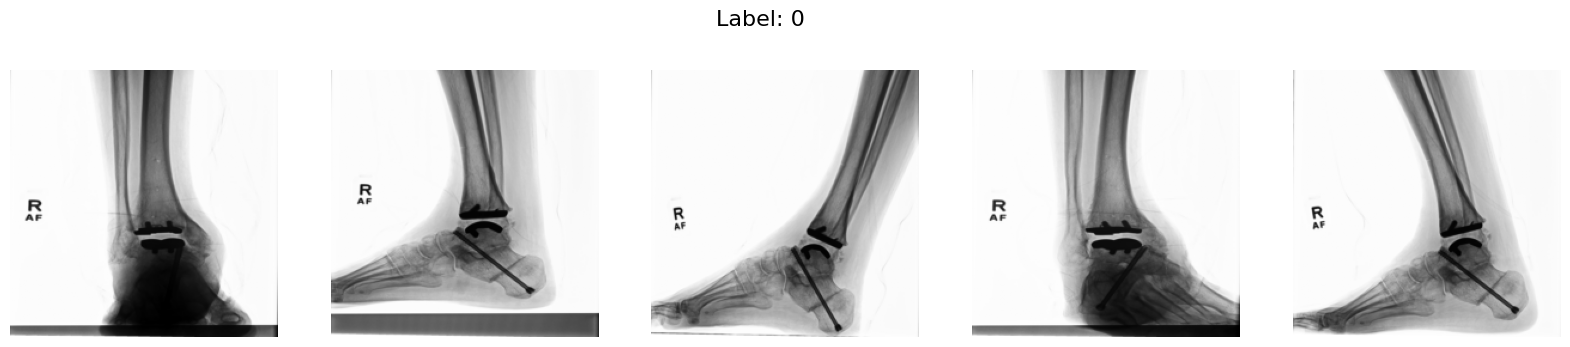

In [10]:
idx = random.randint(0, len(dataset)-1)
image_set, label, patient_info = dataset[idx]
metadata = dataset.get_metadata(idx)

print("Patient info:")
print(patient_info)
print("Metadata:")
for k, v in metadata.items():
    print(f"{k}: {v}")
show_image_set(image_set, int(label), title=f"Label: {int(label)}", num_images=metadata["num_images"])

